# Playing with avocados, part 1- Exploratory Data Analysis

## Table of contents

- [0. Introduction](#0)
- [1. Data preparation](#1)
- [2. Exploratory Data Analysis](#2)
- [2.1 Consumers' favorite avocado](#2.1)
- [2.2 Seasonal Trends](#2.2)
- [2.3 Effects of 2017's shortage](#2.3)
- [3. Conclusion](#3)

## <a id='0'>0. Introduction</a>

This Jupyter Notebook presents an elaboration of the famous data set provided by the Hass Avocado Board and to be found on __["Kaggle"](https://www.kaggle.com/neuromusic/avocado-prices)__.

The Hass Avocado Board provides the following description of the data set:

<blockquote>The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013 (2015, sic), the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.</blockquote>

A brief overview of the content of the columns: 

- `Date` - The date of the observation
- `AveragePrice` - the average price of a single avocado
- `type` - conventional or organic
- `year` - the year
- `Region` - the city or region of the observation
- `Total Volume` - Total number of avocados sold
- `4046` - Total number of avocados with PLU 4046 sold
- `4225` - Total number of avocados with PLU 4225 sold
- `4770` - Total number of avocados with PLU 4770 sold


## <a id='1'>1. Data preparation</a>

Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as pl
import seaborn as sns

Import the data from the .csv file

In [2]:
df = pd.read_csv("avocado.csv")

df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


We do already have an index column, so "Unnamed: 0" can be dropped. Plus the columns' names as they are are difficult to interpret, better to rewrite them

In [3]:
# drop the column

df.drop("Unnamed: 0", axis = 1, inplace= True)

# adjust the columns' names (I found online what those numbers mean)

df.columns = df.columns.str.title()
df.rename(columns ={"Averageprice":"Average Price", "4046":"Small Avocados", "4225":"Medium Avocados", 
                    "4770":"Large Avocados"}, inplace = True)

Let's have a look at the types of data in each column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             18249 non-null  object 
 1   Average Price    18249 non-null  float64
 2   Total Volume     18249 non-null  float64
 3   Small Avocados   18249 non-null  float64
 4   Medium Avocados  18249 non-null  float64
 5   Large Avocados   18249 non-null  float64
 6   Total Bags       18249 non-null  float64
 7   Small Bags       18249 non-null  float64
 8   Large Bags       18249 non-null  float64
 9   Xlarge Bags      18249 non-null  float64
 10  Type             18249 non-null  object 
 11  Year             18249 non-null  int64  
 12  Region           18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


To save some memory we could turn Region into category. Let's see how many distinct values it has.

In [5]:
df["Region"].value_counts().count()

54

As it only has 54 different values, we can turn it into a category.

In [6]:
df["Region"]= df["Region"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Date             18249 non-null  object  
 1   Average Price    18249 non-null  float64 
 2   Total Volume     18249 non-null  float64 
 3   Small Avocados   18249 non-null  float64 
 4   Medium Avocados  18249 non-null  float64 
 5   Large Avocados   18249 non-null  float64 
 6   Total Bags       18249 non-null  float64 
 7   Small Bags       18249 non-null  float64 
 8   Large Bags       18249 non-null  float64 
 9   Xlarge Bags      18249 non-null  float64 
 10  Type             18249 non-null  object  
 11  Year             18249 non-null  int64   
 12  Region           18249 non-null  category
dtypes: category(1), float64(9), int64(1), object(2)
memory usage: 1.7+ MB


Let's check the names of the regions and look for possible mistakes:

In [7]:
set_regions = set(df['Region'].to_list())

set_regions

{'Albany',
 'Atlanta',
 'BaltimoreWashington',
 'Boise',
 'Boston',
 'BuffaloRochester',
 'California',
 'Charlotte',
 'Chicago',
 'CincinnatiDayton',
 'Columbus',
 'DallasFtWorth',
 'Denver',
 'Detroit',
 'GrandRapids',
 'GreatLakes',
 'HarrisburgScranton',
 'HartfordSpringfield',
 'Houston',
 'Indianapolis',
 'Jacksonville',
 'LasVegas',
 'LosAngeles',
 'Louisville',
 'MiamiFtLauderdale',
 'Midsouth',
 'Nashville',
 'NewOrleansMobile',
 'NewYork',
 'Northeast',
 'NorthernNewEngland',
 'Orlando',
 'Philadelphia',
 'PhoenixTucson',
 'Pittsburgh',
 'Plains',
 'Portland',
 'RaleighGreensboro',
 'RichmondNorfolk',
 'Roanoke',
 'Sacramento',
 'SanDiego',
 'SanFrancisco',
 'Seattle',
 'SouthCarolina',
 'SouthCentral',
 'Southeast',
 'Spokane',
 'StLouis',
 'Syracuse',
 'Tampa',
 'TotalUS',
 'West',
 'WestTexNewMexico'}

The values "TotalUS" and "West" do not make sense, so let's get rid of them.

In [8]:
df = df[df.Region != "TotalUS"]
df = df[df.Region != "West"]

In [9]:
# check again

set_regions = set(df['Region'].to_list())

set_regions

{'Albany',
 'Atlanta',
 'BaltimoreWashington',
 'Boise',
 'Boston',
 'BuffaloRochester',
 'California',
 'Charlotte',
 'Chicago',
 'CincinnatiDayton',
 'Columbus',
 'DallasFtWorth',
 'Denver',
 'Detroit',
 'GrandRapids',
 'GreatLakes',
 'HarrisburgScranton',
 'HartfordSpringfield',
 'Houston',
 'Indianapolis',
 'Jacksonville',
 'LasVegas',
 'LosAngeles',
 'Louisville',
 'MiamiFtLauderdale',
 'Midsouth',
 'Nashville',
 'NewOrleansMobile',
 'NewYork',
 'Northeast',
 'NorthernNewEngland',
 'Orlando',
 'Philadelphia',
 'PhoenixTucson',
 'Pittsburgh',
 'Plains',
 'Portland',
 'RaleighGreensboro',
 'RichmondNorfolk',
 'Roanoke',
 'Sacramento',
 'SanDiego',
 'SanFrancisco',
 'Seattle',
 'SouthCarolina',
 'SouthCentral',
 'Southeast',
 'Spokane',
 'StLouis',
 'Syracuse',
 'Tampa',
 'WestTexNewMexico'}

Let's see if there are missing values:

In [10]:
missing_data = df.isnull().sum()
missing_data

Date               0
Average Price      0
Total Volume       0
Small Avocados     0
Medium Avocados    0
Large Avocados     0
Total Bags         0
Small Bags         0
Large Bags         0
Xlarge Bags        0
Type               0
Year               0
Region             0
dtype: int64

Good news: no missing values!

In [11]:
# make sure to round the values for Average Price

df = df.round({"Average Price":2})

df.head()

,Date,Average Price,Total Volume,Small Avocados,Medium Avocados,Large Avocados,Total Bags,Small Bags,Large Bags,Xlarge Bags,Type,Year,Region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Saving the Date column as a timestamp:

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Average Price,Total Volume,Small Avocados,Medium Avocados,Large Avocados,Total Bags,Small Bags,Large Bags,Xlarge Bags,Type,Year,Region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Our data set is now good to go :)

## <a id='2'>2. Exploratory Data Analysis</a> 

In this exploratory data analysis, I will attempt to answer the following three questions:
- what kind of avocado do consumers prefer to buy?
- are there seasonal trends in prices and sales of consumers' favorite avocado?
- whate were the effects of the 2017's shortage?

### <a id='2.1'>2.1 Consumers' favourite avocado</a> 

Before I start modifying the dataframe, I do just a quick check on its actual size:

In [13]:
# check the shape of the data
df.shape

(17573, 13)

So we currently have 17573 rows and 13 columns

Now, I have data for sales by size (Small, Medium, Large) and type (conventional and organic). I want to plot these data in order to get a quick answer to my question:

In [14]:
# create a dataframe only with the necessary columns

question1= df.drop(["Date","Total Volume", "Total Bags", "Small Bags", "Large Bags", "Xlarge Bags", "Year", "Region","Average Price"],
                   axis=1)
question1.head()

,Small Avocados,Medium Avocados,Large Avocados,Type
0,1036.74,54454.85,48.16,conventional
1,674.28,44638.81,58.33,conventional
2,794.70,109149.67,130.50,conventional
3,1132.00,71976.41,72.58,conventional
4,941.48,43838.39,75.78,conventional


To see the total sum for each size of avocado by type, I pivot the data:

In [15]:
#create the pivot table
table= pd.pivot_table(question1, values=['Small Avocados', 'Medium Avocados', 'Large Avocados'], index=["Type"],
                    aggfunc={'Small Avocados': np.sum,
                             'Medium Avocados': np.sum,
                            'Large Avocados': np.sum})

table

,Large Avocados,Medium Avocados,Small Avocados
Type,,,
conventional,2.388028e+08,2.993105e+09,2.859961e+09
organic,1.468289e+06,7.740042e+07,3.362261e+07


There seems to be quite a difference between the units sold by type. The exact percenteage difference is:

In [16]:
#the percentage difference between units sold for the two types

print(table['Large Avocados'].pct_change()*100)
print(table['Medium Avocados'].pct_change()*100)
print(table['Small Avocados'].pct_change()*100)

Type
conventional          NaN
organic        -99.385146
Name: Large Avocados, dtype: float64
Type
conventional          NaN
organic        -97.414043
Name: Medium Avocados, dtype: float64
Type
conventional          NaN
organic        -98.824368
Name: Small Avocados, dtype: float64


All in all, the numbers show that consumers tend to prefer medium conventional avocados, althought small conventional avocados are also sold a lot.

#### ANSWER 1: Consumers prefer to buy conventional medium-sized avocados.

### <a id='2.2'>2.2 Seasonal trends</a>

Concerning the conventional medium-size avocado, are there seasonal trends in the average price and quantity sold?

I first need to create an appropriate dataframe:

In [18]:
#create a version of the dataframe containing only the data we need

question2= df.drop(["Total Volume", "Total Bags", "Small Avocados","Large Avocados","Small Bags", "Large Bags", "Xlarge Bags", "Year", "Region",],
                   axis=1)
question2.head()

,Date,Average Price,Medium Avocados,Type
0,2015-12-27,1.33,54454.85,conventional
1,2015-12-20,1.35,44638.81,conventional
2,2015-12-13,0.93,109149.67,conventional
3,2015-12-06,1.08,71976.41,conventional
4,2015-11-29,1.28,43838.39,conventional


In [19]:
#now we need to select only the conventional type

mask = question2["Type"]== "conventional"

question2 = question2[mask]

Let's plot the seasonal trends for Average Price:

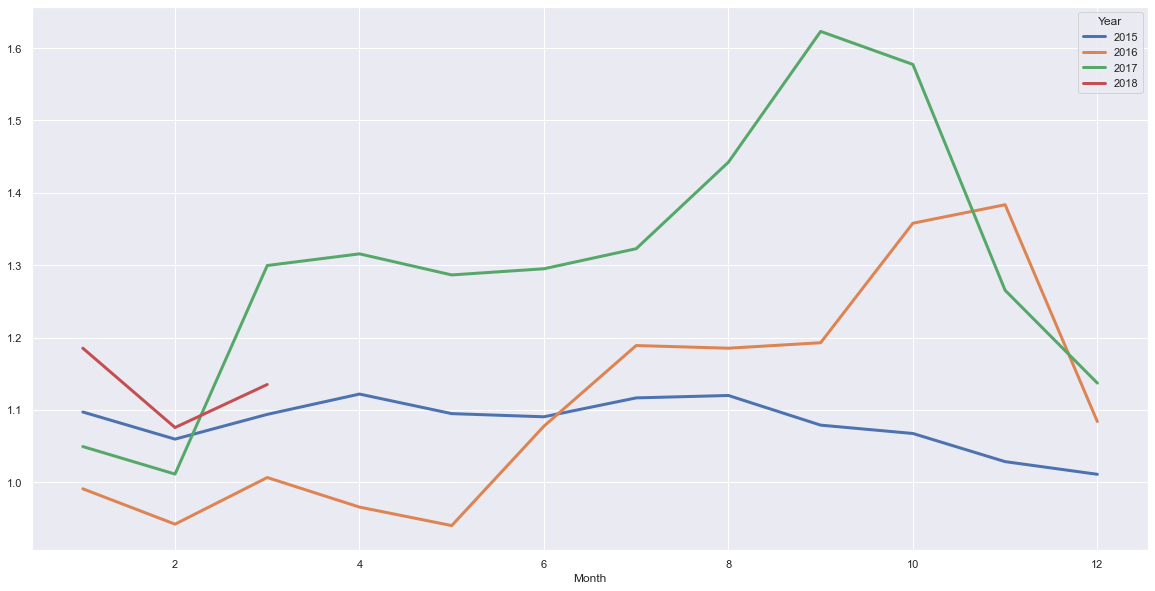

In [20]:
#seasonal trends for average price

sns.set()
season = question2
season['Date'] = question2.Date
season['Year'] = question2['Date'].dt.year
season['Month'] = question2['Date'].dt.month
spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'Average Price', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
pl.show()

We can observe that:

- the price drops between January and February, starting to rise again towards March
- for 2016 and 2017, it increases until October-November it drops in December
- the Average Price was quite stable throughout 2015, while it seems to be more affected by seasonal trends in 2016 and 2017
- the Average Price saw a large increase from February until November 2017
- avocados are more expensive in the second semester of the year

Let's now plot the seasonal trends for units of medium avocados sold:

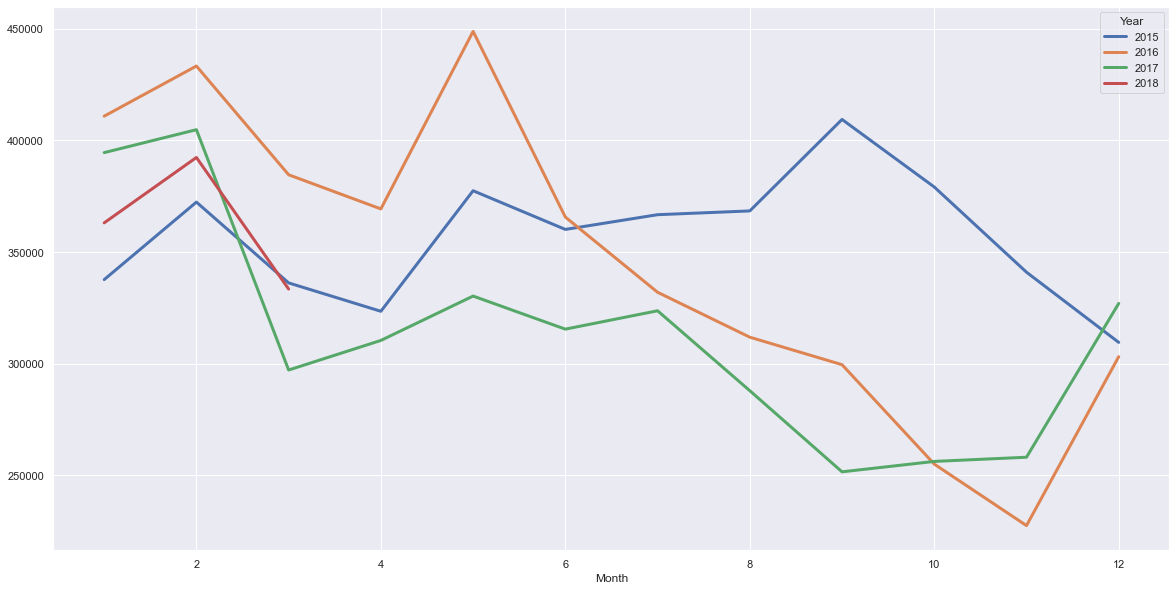

In [21]:
#seasonal trends for quantities sold

sns.set()
season = question2
season['Date'] = question2.Date
season['Year'] = question2['Date'].dt.year
season['Month'] = question2['Date'].dt.month
spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'Medium Avocados', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
pl.show()

From the plot we can observe that:
- sales have a first peak in February, followed by a drop that usually lasts until the second part of March- beginning of April
- a second peak is reached in June while conventional medium-sized avocados are sold the least in automn and winter (despite a peak in sales in September 2015)
- sales in 2017 were way lower than in the previous years
- sales in 2016 were higher than usual during the first 5 months but then plummeted


#### ANSWER 2: a) Buying an avocado in the second part of the year will cost us more, unless it is December where actually the price is usually pretty low. The worse moment for buying is usually right after August. Possibly the best deals can be made beginning of February. b) Consumers seem to have understood that beginning of February is a good moment for buying their favorite avocados. But they also love it as summer food, while shifting their preferences during colder times.

###  <a id='2.3'>2.3 Effects of 2017's shortage</a>

Premise: we do only have the average price across size of avocado so we cannot see changes in prices for avocados of medium size only.

Due to a reduce harvest in Mexico, Perù and California, and a stable if not increasing demand, in 2017 avocados prices increased everywhere in the US.

By plotting a heatmap it is possible to a first visualizion of the evolution of prices over time and region. 
As the conventional type of avocado is usually sold way more than the organic one, we are going to observe changes for the conventional type only.
We must first pivot the table.

In [22]:
#now we select only the conventional type

mask = df["Type"]== "conventional"

df3 = df[mask]

In [23]:
table_heat = pd.pivot_table(df3, values='Average Price', index=['Region'], columns=['Year'], aggfunc=np.mean)
    
table_heat.head(20)

Year,2015,2016,2017,2018
Region,,,,
Albany,1.171923,1.345769,1.526415,1.343333
Atlanta,1.052308,0.972885,1.192453,1.010000
BaltimoreWashington,1.168077,1.356538,1.514717,1.300833
Boise,1.054038,0.878269,1.268113,1.180000
Boston,1.144038,1.263077,1.495283,1.335000
BuffaloRochester,1.403462,1.330192,1.443396,1.246667
California,1.020385,1.046154,1.253019,1.079167
Charlotte,1.148462,1.255962,1.423962,1.249167
Chicago,1.153654,1.331154,1.606226,1.423333


Now we can create the heatmap:

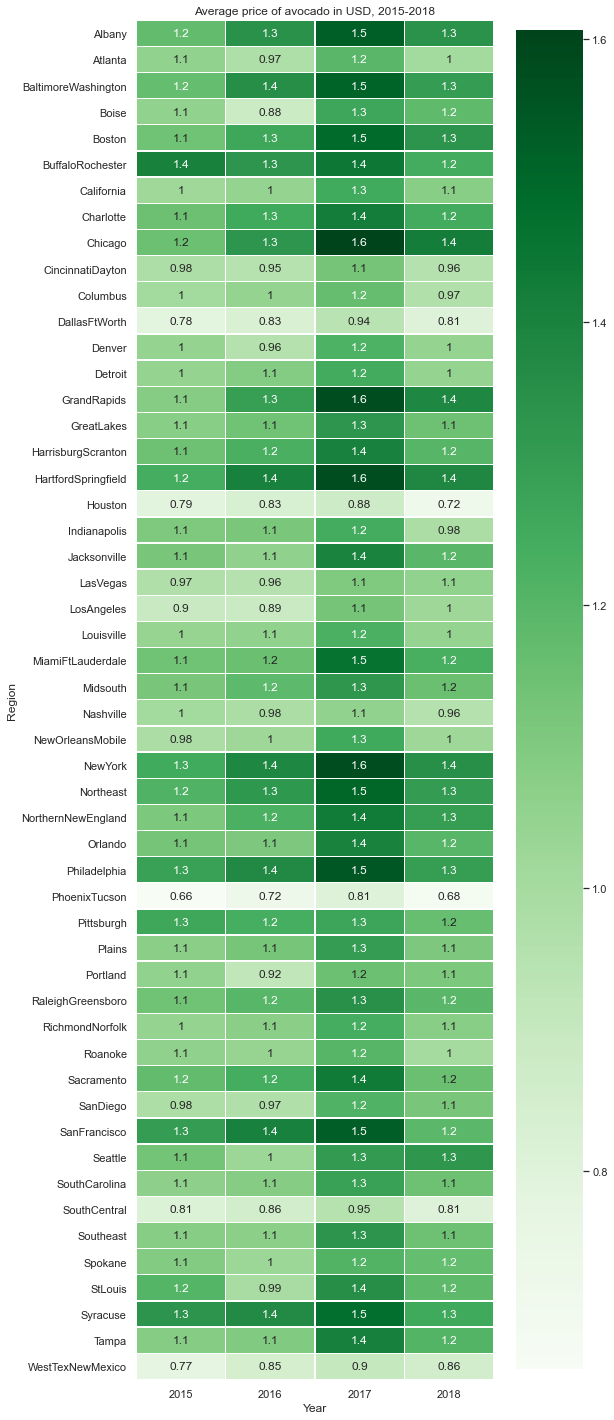

In [24]:
# setting the size
pl.figure(figsize=(8, 25))

# plot heatmap
sns.heatmap(table_heat, cmap="Greens", annot = True, xticklabels= True, yticklabels= True, linewidth=0.3)

# title
title = 'Average price of avocado in USD, 2015-2018'
pl.title(title, loc='center')
pl.show()

Regions particularly affected by the increase in prices (i.e. equal to 1.6 USD) were New York, Hartford Springfield, Grand Rapids, Chicago. For seeing this change on a map, please look at the Part 2.

##### How did it affect the quantity sold?

We now will try to understand the change in total volume of sold in 2016 and 2017:

In [25]:
#keep in mind that data for 2018 are not complete in this data set so no sense including it in percentual change overview

df['Date'].max()

Timestamp('2018-03-25 00:00:00')

In [26]:
# so we first create dataframe with only 2015, 2016 and 2017

cond= (df3['Year']== 2015) | (df3['Year']== 2016) | (df3['Year']== 2017)

change =df3[cond]

We want to create a table with % change:

In [27]:
# pivot the data
table3= pd.pivot_table(change, values=['Small Avocados','Medium Avocados', 'Large Avocados','Total Volume', 'Average Price'],
                        index=["Year"],
                    aggfunc={'Small Avocados' : np.sum,
                        'Medium Avocados' : np.sum,
                        'Large Avocados' : np.sum,
                        'Total Volume': np.sum,
                        'Average Price': np.mean})

table3

,Average Price,Large Avocados,Medium Avocados,Small Avocados,Total Volume
Year,,,,,
2015,1.081875,82667192.63,9.645666e+08,9.142409e+08,2.378837e+09
2016,1.110377,91755638.38,9.367192e+08,8.084535e+08,2.586936e+09
2017,1.300076,51393054.09,8.653309e+08,8.867390e+08,2.631583e+09


In [28]:
#calculate the percetual change from one year to the other

table3 = (table3.pct_change())*100
table3

,Average Price,Large Avocados,Medium Avocados,Small Avocados,Total Volume
Year,,,,,
2015,NaN,NaN,NaN,NaN,NaN
2016,2.634521,10.994018,-2.887031,-11.571069,8.747931
2017,17.084192,-43.989214,-7.621107,9.683363,1.725876


Let's make the table easier to read:

In [29]:
#drop 2015
perc_change_view = table3.drop(labels= 2015, axis= 'index')

In [30]:
# add colors

#define the color function

def color_negative_red(value):

  if value < 0:
    color = 'red'
  else:
    color = 'green'

  return 'color: %s' % color

In [31]:
#apply colors depending on whether the value is positive or negative

perc_change_view.style.applymap(color_negative_red, subset=['Average Price','Large Avocados', "Medium Avocados",
                                                           "Small Avocados", "Total Volume"])

,Average Price,Large Avocados,Medium Avocados,Small Avocados,Total Volume
Year,,,,,
2016,2.634521,10.994018,-2.887031,-11.571069,8.747931
2017,17.084192,-43.989214,-7.621107,9.683363,1.725876


We notice that:

- Average Price increased by 17% in 2017
- sales for Large Avocados were the most affected, -44%
- consumers started to prefer small avocados, +10%
- sales for Medium Avocados were sinkin in 2016 too but reached even lower in 2017, -8%
- Total Volume increased by almost 2%

#### ANSWER 3: Due to the reduced harvest, the average price for conventional avocados in 2017 saw an increase of 17%. The regions the most affected were New York, Hartford Springfield, Grand Rapids, Chicago, were average prices reached 1.6 USD. During the shortage, consumers started buying more conventional small-sized avocados possibly due to the lower purchasing power. 

## <a id='3'>Conclusion</a> 

To summarize, from this analysis we learned that:

- Consumers prefer to buy conventional medium-sized avocados.
- Buying an avocado in the second part of the year will cost us more, unless it is December where actually the price is usually pretty low. The worse moment for buying is usually right after August. Possibly the best deals can be made beginning of February. Consumers seem to have understood that beginning of February is a good moment for buying their favorite avocados. But they also love it as summer food, while shifting their preferences during colder times.
- Due to the reduced harvest, the average price for conventional avocados in 2017 saw an increase of 17%. The regions the most affected were New York, Hartford Springfield, Grand Rapids, Chicago, were average prices reached 1.6 USD. During the shortage, consumers started buying more conventional small-sized avocados possibly due to the lower purchasing power. 